# Analyzing Mobile Game Revenue & Player Engagement

This notebook analyzes revenue and daily active user (DAU) trends. The goal is to identify patterns, anomalies, and potential correlations between revenue performance and user engagement over time.

# 0. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

</br>

# 1. Data Collection

In this section, we load and inspect the dataset(s) containing revenue and DAU data.

📌 Key Points:

- Revenue Data: This dataset contains daily revenue figures, allowing us to assess financial performance trends.
- Daily Active Users (DAU): This dataset tracks the number of unique users accessing the platform each day, which helps measure engagement.

💡 Goal:

- Load the datasets.
- Check for missing values and data inconsistencies.
- Convert date columns to proper datetime format for time-series analysis.

In [2]:
# Function that reads and merges multiple csvs
def read_merge_csvs(file1, file2, on_column, how):
    # Read both csv files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    # Merge the two csv files
    merged_df = pd.merge(df1, df2, on=on_column, how=how)
    
    return merged_df

In [3]:
df = read_merge_csvs('Revenue.csv', 'Daily_Active_Users.csv', 'Date', 'inner')

In [4]:
df.head()

,Date,Revenue,Daily Active Users
0,2022-01-01,"$4,141.11",10981
1,2022-01-02,"$4,191.86",10730
2,2022-01-03,"$4,406.19",10846
3,2022-01-04,"$4,375.55",11386
4,2022-01-05,"$4,084.96",10916


</br>

# 2. Data Cleaning

Before conducting any analysis, we need to ensure the dataset is clean and properly formatted.

📌 Steps Taken:

- Handling Missing Data: Fill or remove missing values based on context.
- Ensuring Correct Data Types: Convert date columns to datetime for time-based analysis.
- Removing Duplicates: Check for and remove any duplicate entries.
- Standardizing Formats: Ensure numerical values are in a consistent format.

The following columns require cleaning:
- Reformat all columns to snake case for best practices
- Revenue
    - Remove commas and dollar signs
    - Convert to float
- Date
    - Convert to datetime

In [5]:
# Function that preprocesses dataframe
def preprocess_data(df):
    # Convert columns to snake case
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    
    # Remove '$', ',' and convert to float
    df['revenue'] = df['revenue'].replace({'\$': '', ',':''}, regex=True).astype(float) 
    
    # Convert to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    return df

In [6]:
df = preprocess_data(df)

</br>

# 3. Feature engineering

Since the dataset is fairly simple, we'll increase the complexity and potential for deeper insights by engineering a couple of new features.

Features to be added:
- Quarter
- Month
- Day
- Revenue per User
    - How much revenue is generated per active user
- DAU difference
    - Calculate the difference in daily active users from previous day
- DAU percentage change
- Revenue difference
    - Calculate the difference in revenue from previous day
- Cumulative Revenue
    - Track revenue growth over time
- Revenue percentage change

## 3.1 Quarter

In [7]:
# Calculate quarter from date
df['quarter'] = df['date'].dt.quarter

## 3.2. Month

In [8]:
# Calculate months from date
df['month'] = df['date'].dt.month

## 3.3 Day

In [9]:
# Calculate days from date
df['day'] = df['date'].dt.day_name()

## 3.4 Revenue per User

In [10]:
# Calculate revenue per user, rounding by 2 
df['revenue_per_user'] = round((df['revenue'] / df['daily_active_users']), 2)

## 3.5 Daily Active Users difference (previous day)

In [11]:
# Calculate previous day difference for daily active users, filling na with 0 
df['daily_active_users_diff'] = df['daily_active_users'].diff().fillna(0)

## 3.6 Daily Active Users percentage change

In [12]:
# Calculate percentage change of daily active users, rounding by 2
df['daily_active_users_pct_change'] = round(df['daily_active_users'].pct_change(), 2)

# Address NaN that will appear on January first due to no previous day, filling na with 0 
df['daily_active_users_pct_change'] = df['daily_active_users_pct_change'].fillna(0)

## 3.7 Cumulative revenue

In [13]:
# Calculate cumulative sum of review
df['cumulative_revenue'] = df['revenue'].cumsum()

## 3.8 Revenue difference (previous day)

In [14]:
# Calculate previous day difference
df['revenue_diff'] = df['revenue'].diff().fillna(0)

## 3.9 Revenue percentage change

In [15]:
# Calculate percentage change of revenue, rounding by 2
df['revenue_pct_change'] = round(df['revenue'].pct_change(), 2)

# Address NaN that will appear on January first due to no previous day
df['revenue_pct_change'] = df['revenue_pct_change'].fillna(0)

## 3.10 Update column positions

In [16]:
col_order = ['date', 'quarter', 'month', 'day', 'daily_active_users', 'daily_active_users_diff', 'daily_active_users_pct_change',
            'revenue', 'cumulative_revenue', 'revenue_diff', 'revenue_pct_change', 'revenue_per_user']

# Update column order
df = df[col_order]

In [17]:
# Save updated dataset
df.to_csv('dau_revenue_data.csv', index=False)

</br>

# 4. Exploratory Data Analysis

In [12]:
df = pd.read_csv('dau_revenue_data.csv')

## 4.1 General analysis

In [19]:
df.head()

,date,quarter,month,day,daily_active_users,daily_active_users_diff,daily_active_users_pct_change,revenue,cumulative_revenue,revenue_diff,revenue_pct_change,revenue_per_user
0,2022-01-01,1,1,Saturday,10981,0.0,0.00,4141.11,4141.11,0.00,0.00,2.65
1,2022-01-02,1,1,Sunday,10730,-251.0,-0.02,4191.86,8332.97,50.75,0.01,2.56
2,2022-01-03,1,1,Monday,10846,116.0,0.01,4406.19,12739.16,214.33,0.05,2.46
3,2022-01-04,1,1,Tuesday,11386,540.0,0.05,4375.55,17114.71,-30.64,-0.01,2.60
4,2022-01-05,1,1,Wednesday,10916,-470.0,-0.04,4084.96,21199.67,-290.59,-0.07,2.67


In [20]:
df.describe()

,quarter,month,daily_active_users,daily_active_users_diff,daily_active_users_pct_change,revenue,cumulative_revenue,revenue_diff,revenue_pct_change,revenue_per_user
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,3.410000e+02,341.000000,341.000000,341.000000
mean,2.524927,6.551320,19682.821114,18.384164,0.001672,5495.577243,9.150437e+05,15.371114,0.003519,4.028974
std,1.099516,3.429265,8628.610604,469.072811,0.027469,1301.072375,5.240393e+05,226.171786,0.043324,2.630251
min,1.000000,1.000000,10717.000000,-1339.000000,-0.070000,3392.380000,4.141110e+03,-597.910000,-0.120000,1.770000
25%,2.000000,4.000000,12506.000000,-302.000000,-0.020000,4390.210000,4.480519e+05,-135.840000,-0.020000,2.120000
50%,3.000000,7.000000,17041.000000,36.000000,0.000000,5328.770000,9.813255e+05,0.000000,0.000000,2.560000
75%,3.000000,9.000000,24979.000000,337.000000,0.020000,6357.510000,1.328693e+06,170.000000,0.030000,5.580000
max,4.000000,12.000000,38224.000000,1791.000000,0.100000,9397.390000,1.873992e+06,673.540000,0.140000,11.080000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           341 non-null    object 
 1   quarter                        341 non-null    int64  
 2   month                          341 non-null    int64  
 3   day                            341 non-null    object 
 4   daily_active_users             341 non-null    int64  
 5   daily_active_users_diff        341 non-null    float64
 6   daily_active_users_pct_change  341 non-null    float64
 7   revenue                        341 non-null    float64
 8   cumulative_revenue             341 non-null    float64
 9   revenue_diff                   341 non-null    float64
 10  revenue_pct_change             341 non-null    float64
 11  revenue_per_user               341 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 3

In [10]:
df.isna().sum()

date                  0
revenue               0
daily_active_users    0
dtype: int64

## 4.2 Functions to explore features

In [3]:
# Function to return value counts and frequency of the specified feature
def value_count_norm(df, feature):
    ftr_value_count = df[feature].value_counts()
    ftr_value_count_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_count_concat = pd.concat([ftr_value_count, ftr_value_count_norm], axis=1)
    ftr_value_count_concat.columns = ['Count', 'Frequency (%)']

    return ftr_value_count_concat

In [4]:
# Function to print general information about the feature
def gen_info(df, feature):
    print(f'Description: \n{df[feature].describe()}')
    print('*'*50)
    print(f'Object type: {df[feature].dtype}')
    print('*'*50)
    value_count = value_count_norm(df,feature).sort_values('Count', ascending=False)
    print(f'Value count: \n{value_count}')

In [5]:
# Function to create a box plot
def create_box_plot(df, feature):
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.boxplot(y=df[feature])
    feature_label = feature.capitalize().replace('_', ' ')
    ax.set_ylabel(feature_label)
    plt.title(f'{feature_label} box plot')
    
    return plt.show()

In [6]:
# Function to create a histogram plot
def create_hist_plot(df, feature, bin_count=20):
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.histplot(df[feature], bins=bin_count, kde=True)
    feature_label = feature.capitalize().replace('_', ' ')
    ax.set_xlabel(feature_label)
    plt.title(f'{feature_label} histogram')
    
    return plt.show()

In [7]:
# Function to create a bar plot
def create_bar_plot(df, feature1, feature2, agg):
    match agg:
        case 'sum':
            # Group by feature and calculate the sum of the specified feature
            feature_group = df.groupby(feature1)[feature2].sum()

        case 'mean':
            # Group by feature and calculate the mean of the specified feature
            feature_group = df.groupby(feature1)[feature2].mean()

        case _:
            # Raise error if one of the specified aggregations are not provided
            raise ValueError("Invalid aggregation. Use 'sum' or 'mean'.")
    
    fig, ax = plt.subplots(figsize=(11, 4))
    sns.barplot(x=feature_group.index, y=feature_group.values)
    
    feature1_label = feature1.capitalize().replace('_', ' ')
    feature2_label = feature2.capitalize().replace('_', ' ')

    ax.set_xlabel(feature1_label)
    ax.set_ylabel(feature2_label)
    
    # Remove scientific notation from y-axis
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    
    ax.set_title(f'{feature2_label} by {feature1_label}')
    
    return plt.show()

In [8]:
# Function to create a line plot that groups data by month
def create_line_plot_month(df, month, feature2):
    # Ensure 'date' is in datetime format
    df['date'] = pd.to_datetime(df['date'])    

    # Filter dataframe based on the specified month
    filtered_df = df[df['date'].dt.month_name() == month.capitalize()]
    
    filtered_df = filtered_df.sort_values('date', ascending=True)
    
    plt.figure(figsize=(11, 4))
    plt.plot(filtered_df['date'], filtered_df[feature2], marker='o', linestyle='-')
    
    month_label = month.capitalize().replace('_', ' ')
    feature2_label = feature2.capitalize().replace('_', ' ')
    
    # Change the x-axis to only show the day of the month
    ax = plt.gca()  # Get current axes
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))  # Format as day of the month
    
    # Set all days as x-ticks
    ax.set_xticks(filtered_df['date'])
    
    # Rotate x-tick labels for better visibility if needed
    plt.xticks(rotation=45)
    
    plt.xlabel(month_label)
    plt.ylabel(feature2_label)
    plt.title(f'{feature2_label} in {month_label}')
    
    return plt.show()

In [9]:
# Function to create a line plot that groups data by specified quarter
def create_line_plot_quarter(df, quarter, feature2):
    # Ensure 'date' is in datetime format
    df['date'] = pd.to_datetime(df['date'])    

    # Filter dataframe based on the specified month
    filtered_df = df[df['date'].dt.quarter == quarter]
    
    filtered_df = filtered_df.sort_values('date', ascending=True)
    
    plt.figure(figsize=(11, 4))
    plt.plot(filtered_df['date'], filtered_df[feature2], marker='o', linestyle='-')
    
    quarter_label = f'Q{quarter}'
    feature2_label = feature2.capitalize().replace('_', ' ')
    
    # Change the x-axis to only show the day of the month
    ax = plt.gca()  # Get current axes
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))  # Format as day of the month
    
    # Set all days as x-ticks
    ax.set_xticks(filtered_df['date'])
    
    # Rotate x-tick labels for better visibility if needed
    plt.xticks(rotation=45)
    
    plt.xlabel('Day of Month')
    plt.ylabel(feature2_label)
    plt.title(f'{feature2_label} in {quarter_label}')
    
    return plt.show()

In [10]:
# Function to create a scatter plot
def create_scatter_plot(df, feature1, feature2):
    plt.figure(figsize=(11, 4))
    sns.scatterplot(x=feature1, y=feature2, data=df)
    
    feature1_label = feature1.capitalize().replace('_', ' ')
    feature2_label = feature2.capitalize().replace('_', ' ')
    
    plt.xlabel(feature1_label)
    plt.ylabel(feature2_label)
    
    plt.title(f'{feature2_label} vs. {feature1_label}')
    
    return plt.show()

## 4.3 Univariate analysis

### 4.3.1 Date

In [36]:
gen_info(df, 'date')

Description: 
count            341
unique           341
top       2022-01-01
freq               1
Name: date, dtype: object
**************************************************
Object type: object
**************************************************
Value count: 
            Count  Frequency (%)
date                            
2022-01-01      1       0.293255
2022-02-11      1       0.293255
2022-01-03      1       0.293255
2022-01-04      1       0.293255
2022-01-05      1       0.293255
...           ...            ...
2022-12-28      1       0.293255
2022-12-29      1       0.293255
2022-12-30      1       0.293255
2022-12-13      1       0.293255
2022-12-31      1       0.293255

[341 rows x 2 columns]


### 4.3.2 Quarter

In [37]:
gen_info(df, 'revenue')

Description: 
count     341.000000
mean     5495.577243
std      1301.072375
min      3392.380000
25%      4390.210000
50%      5328.770000
75%      6357.510000
max      9397.390000
Name: revenue, dtype: float64
**************************************************
Object type: float64
**************************************************
Value count: 
         Count  Frequency (%)
revenue                      
6050.57      2       0.586510
4357.29      1       0.293255
4406.19      1       0.293255
4375.55      1       0.293255
4084.96      1       0.293255
...        ...            ...
9172.34      1       0.293255
9397.39      1       0.293255
7850.49      1       0.293255
7983.02      1       0.293255
9382.66      1       0.293255

[340 rows x 2 columns]


### 4.3.3 Month

In [38]:
gen_info(df, 'month')

Description: 
count    341.000000
mean       6.551320
std        3.429265
min        1.000000
25%        4.000000
50%        7.000000
75%        9.000000
max       12.000000
Name: month, dtype: float64
**************************************************
Object type: int64
**************************************************
Value count: 
       Count  Frequency (%)
month                      
1         31       9.090909
5         31       9.090909
7         31       9.090909
10        31       9.090909
12        31       9.090909
4         30       8.797654
6         30       8.797654
9         30       8.797654
8         26       7.624633
3         24       7.038123
2         23       6.744868
11        23       6.744868


### 4.4.4 Day

In [40]:
gen_info(df, 'day')

Description: 
count          341
unique           7
top       Saturday
freq            49
Name: day, dtype: object
**************************************************
Object type: object
**************************************************
Value count: 
           Count  Frequency (%)
day                            
Saturday      49      14.369501
Sunday        49      14.369501
Monday        49      14.369501
Thursday      49      14.369501
Friday        49      14.369501
Tuesday       48      14.076246
Wednesday     48      14.076246


### 4.4.5 Daily Active Users

In [41]:
gen_info(df, 'daily_active_users')

Description: 
count      341.000000
mean     19682.821114
std       8628.610604
min      10717.000000
25%      12506.000000
50%      17041.000000
75%      24979.000000
max      38224.000000
Name: daily_active_users, dtype: float64
**************************************************
Object type: int64
**************************************************
Value count: 
                    Count  Frequency (%)
daily_active_users                      
11827                   3       0.879765
29574                   2       0.586510
12387                   2       0.586510
37584                   2       0.586510
10730                   2       0.586510
...                   ...            ...
16764                   1       0.293255
16918                   1       0.293255
17166                   1       0.293255
17694                   1       0.293255
17250                   1       0.293255

[335 rows x 2 columns]


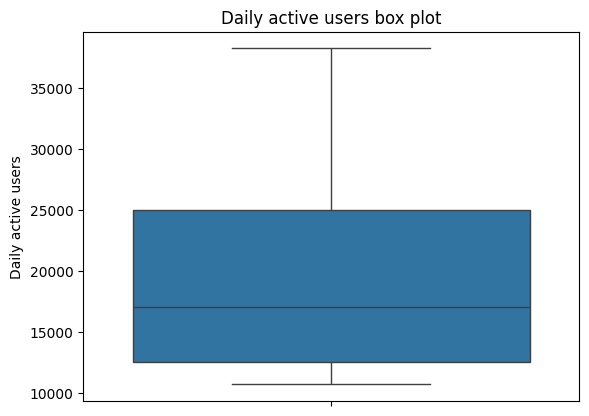

In [47]:
create_box_plot(df, 'daily_active_users')

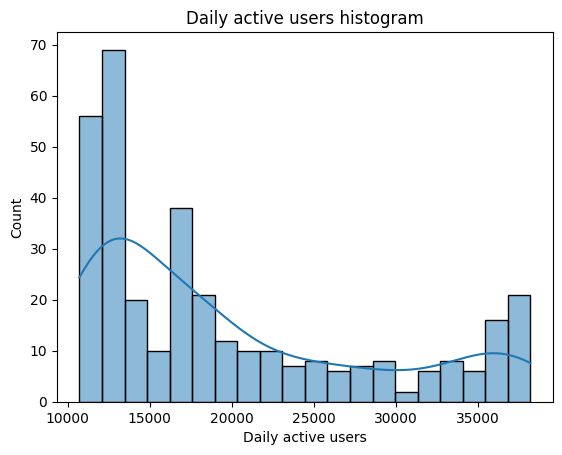

In [50]:
create_hist_plot(df, 'daily_active_users')

Interpretation:
- 19.6k Daily active users
- Right-skewed
- Most days accrue 10-15k DAU
- Rare peaks at 35K+

### 4.4.6 Daily Active Users Difference

In [52]:
gen_info(df, 'daily_active_users_diff')

Description: 
count     341.000000
mean       18.384164
std       469.072811
min     -1339.000000
25%      -302.000000
50%        36.000000
75%       337.000000
max      1791.000000
Name: daily_active_users_diff, dtype: float64
**************************************************
Object type: float64
**************************************************
Value count: 
                         Count  Frequency (%)
daily_active_users_diff                      
 36.0                        3       0.879765
 185.0                       2       0.586510
 510.0                       2       0.586510
 271.0                       2       0.586510
-436.0                       2       0.586510
...                        ...            ...
-508.0                       1       0.293255
 142.0                       1       0.293255
-11.0                        1       0.293255
-694.0                       1       0.293255
-444.0                       1       0.293255

[304 rows x 2 columns]


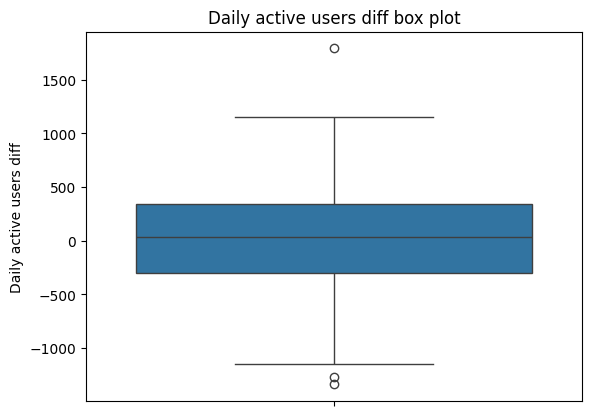

In [53]:
create_box_plot(df, 'daily_active_users_diff')

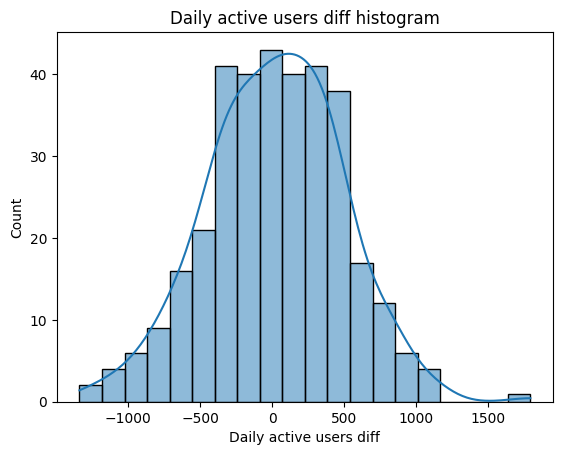

In [54]:
create_hist_plot(df, 'daily_active_users_diff')

Interpretation:
- Slight outlier around 1200 (Next day growth)
- Normally distributed (Change in active users is relatively small)

### 4.4.7 Daily Active Users percentage change

In [55]:
gen_info(df, 'daily_active_users_pct_change')

Description: 
count    341.000000
mean       0.001672
std        0.027469
min       -0.070000
25%       -0.020000
50%        0.000000
75%        0.020000
max        0.100000
Name: daily_active_users_pct_change, dtype: float64
**************************************************
Object type: float64
**************************************************
Value count: 
                               Count  Frequency (%)
daily_active_users_pct_change                      
 0.01                             57      16.715543
 0.00                             49      14.369501
-0.01                             48      14.076246
 0.02                             36      10.557185
-0.03                             35      10.263930
-0.02                             31       9.090909
 0.03                             30       8.797654
 0.04                             12       3.519062
-0.04                             12       3.519062
 0.05                              7       2.052786
-0.05        

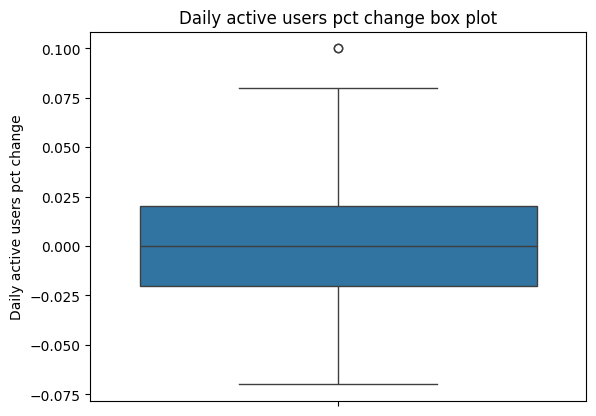

In [56]:
create_box_plot(df, 'daily_active_users_pct_change')

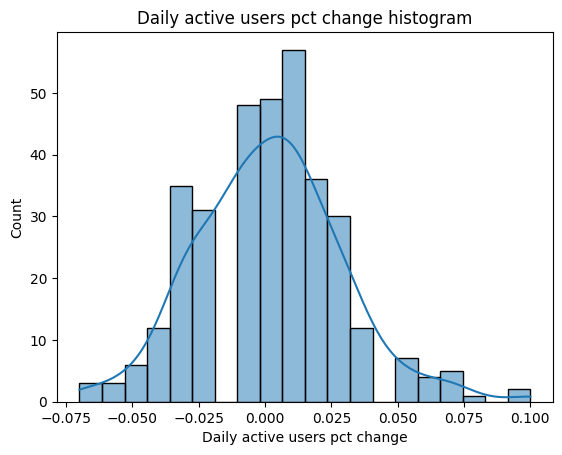

In [57]:
create_hist_plot(df, 'daily_active_users_pct_change')

### 4.4.8 Revenue

In [59]:
gen_info(df, 'revenue')

Description: 
count     341.000000
mean     5495.577243
std      1301.072375
min      3392.380000
25%      4390.210000
50%      5328.770000
75%      6357.510000
max      9397.390000
Name: revenue, dtype: float64
**************************************************
Object type: float64
**************************************************
Value count: 
         Count  Frequency (%)
revenue                      
6050.57      2       0.586510
4357.29      1       0.293255
4406.19      1       0.293255
4375.55      1       0.293255
4084.96      1       0.293255
...        ...            ...
9172.34      1       0.293255
9397.39      1       0.293255
7850.49      1       0.293255
7983.02      1       0.293255
9382.66      1       0.293255

[340 rows x 2 columns]


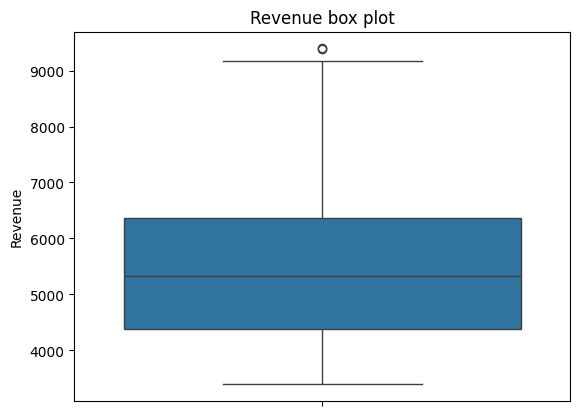

In [60]:
create_box_plot(df, 'revenue')

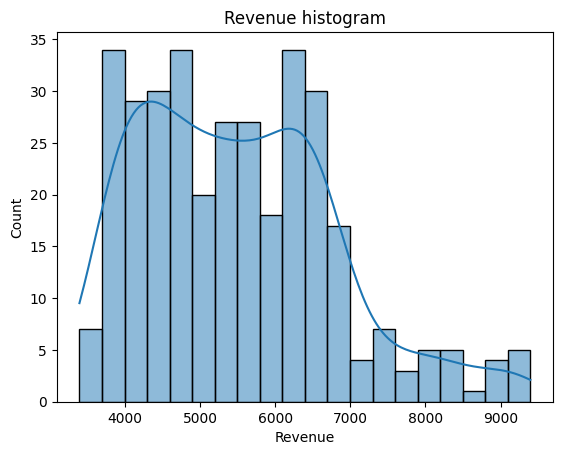

In [61]:
create_hist_plot(df, 'revenue')

Interpretation:
- AVG daily revenue is 5495
- Outlier of 9397
- Right-skewed

### 4.4.9 Cumulative Revenue

In [62]:
gen_info(df, 'cumulative_revenue')

Description: 
count    3.410000e+02
mean     9.150437e+05
std      5.240393e+05
min      4.141110e+03
25%      4.480519e+05
50%      9.813255e+05
75%      1.328693e+06
max      1.873992e+06
Name: cumulative_revenue, dtype: float64
**************************************************
Object type: float64
**************************************************
Value count: 
                    Count  Frequency (%)
cumulative_revenue                      
4141.11                 1       0.293255
195345.88               1       0.293255
12739.16                1       0.293255
17114.71                1       0.293255
21199.67                1       0.293255
...                   ...            ...
1846039.45              1       0.293255
1855211.79              1       0.293255
1864609.18              1       0.293255
1717340.34              1       0.293255
1873991.84              1       0.293255

[341 rows x 2 columns]


### 4.4.10 Revenue Difference

In [65]:
gen_info(df, 'revenue_diff')

Description: 
count    341.000000
mean      15.371114
std      226.171786
min     -597.910000
25%     -135.840000
50%        0.000000
75%      170.000000
max      673.540000
Name: revenue_diff, dtype: float64
**************************************************
Object type: float64
**************************************************
Value count: 
              Count  Frequency (%)
revenue_diff                      
 391.27           2       0.586510
-454.06           2       0.586510
 287.51           1       0.293255
-10.45            1       0.293255
-290.59           1       0.293255
...             ...            ...
 3.57             1       0.293255
 225.05           1       0.293255
-132.53           1       0.293255
-61.82            1       0.293255
-14.73            1       0.293255

[339 rows x 2 columns]


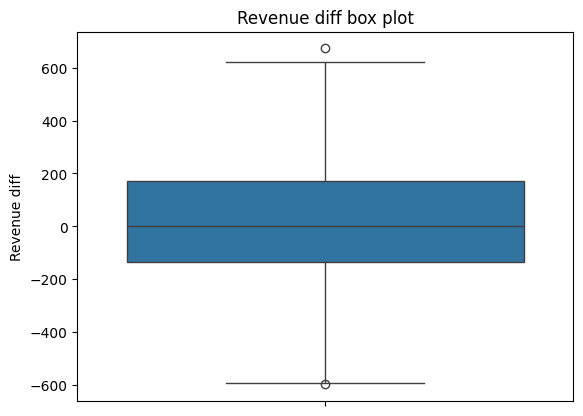

In [66]:
create_box_plot(df, 'revenue_diff')

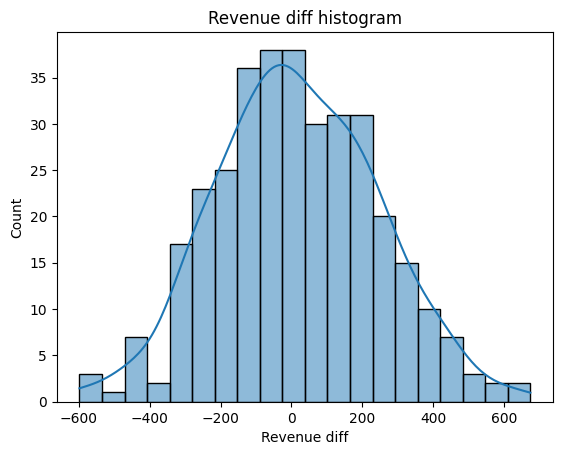

In [67]:
create_hist_plot(df, 'revenue_diff')

Interpretation:
- Minimal outliers
- Histogram: Normally distributed

### 4.4.11 Revenue percentage change

In [68]:
gen_info(df, 'revenue_pct_change')

Description: 
count    341.000000
mean       0.003519
std        0.043324
min       -0.120000
25%       -0.020000
50%        0.000000
75%        0.030000
max        0.140000
Name: revenue_pct_change, dtype: float64
**************************************************
Object type: float64
**************************************************
Value count: 
                    Count  Frequency (%)
revenue_pct_change                      
 0.00                  36      10.557185
-0.02                  34       9.970674
 0.02                  31       9.090909
-0.01                  30       8.797654
 0.03                  25       7.331378
 0.04                  25       7.331378
 0.01                  23       6.744868
-0.03                  22       6.451613
-0.04                  19       5.571848
-0.05                  15       4.398827
 0.05                  15       4.398827
-0.06                  12       3.519062
 0.06                  10       2.932551
 0.08                   9       2

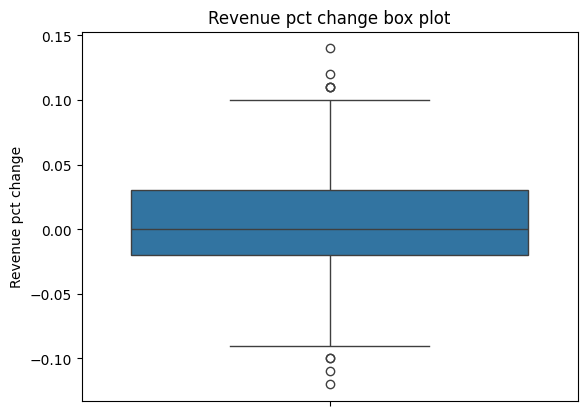

In [69]:
create_box_plot(df, 'revenue_pct_change')

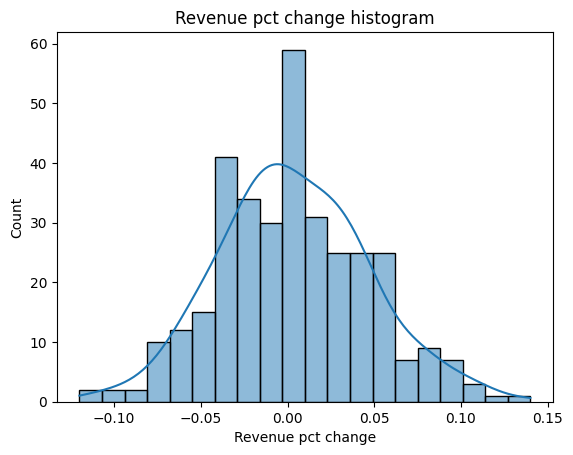

In [70]:
create_hist_plot(df, 'revenue_pct_change')

Interpretation:
- +/- outliers
- % change growth is more common

### 4.4.12 Revenue per User

In [71]:
gen_info(df, 'revenue_per_user')

Description: 
count    341.000000
mean       4.028974
std        2.630251
min        1.770000
25%        2.120000
50%        2.560000
75%        5.580000
max       11.080000
Name: revenue_per_user, dtype: float64
**************************************************
Object type: float64
**************************************************
Value count: 
                  Count  Frequency (%)
revenue_per_user                      
2.08                  7       2.052786
2.11                  5       1.466276
1.93                  5       1.466276
2.30                  5       1.466276
2.27                  5       1.466276
...                 ...            ...
1.86                  1       0.293255
3.85                  1       0.293255
4.39                  1       0.293255
7.07                  1       0.293255
1.85                  1       0.293255

[219 rows x 2 columns]


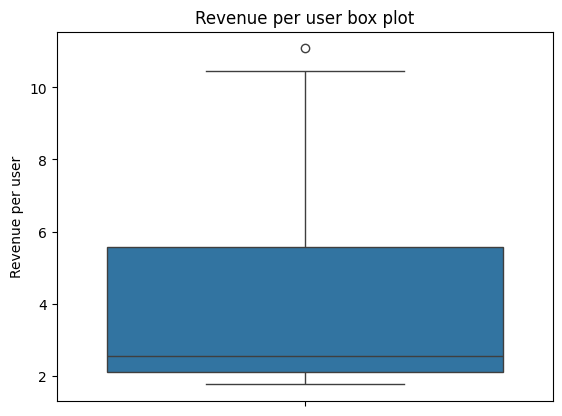

In [72]:
create_box_plot(df, 'revenue_per_user')

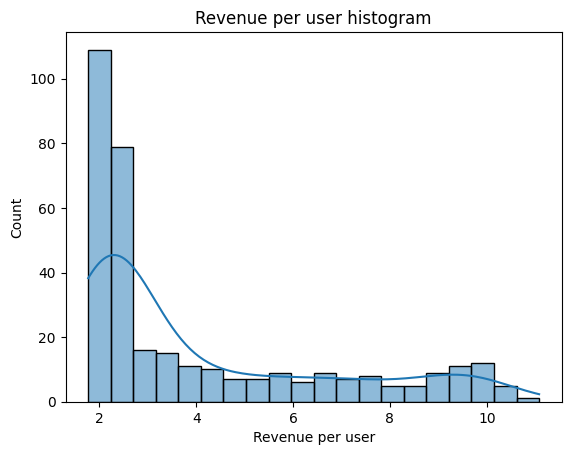

In [73]:
create_hist_plot(df, 'revenue_per_user')

Interpretation:
- AVG revenue per user is 4
- Max is 11
- Majority of users are around 2, 3
- Heavy right-skew

## 4.4 Bivariate analysis

### 4.4.1 Total Revenue by Quarter

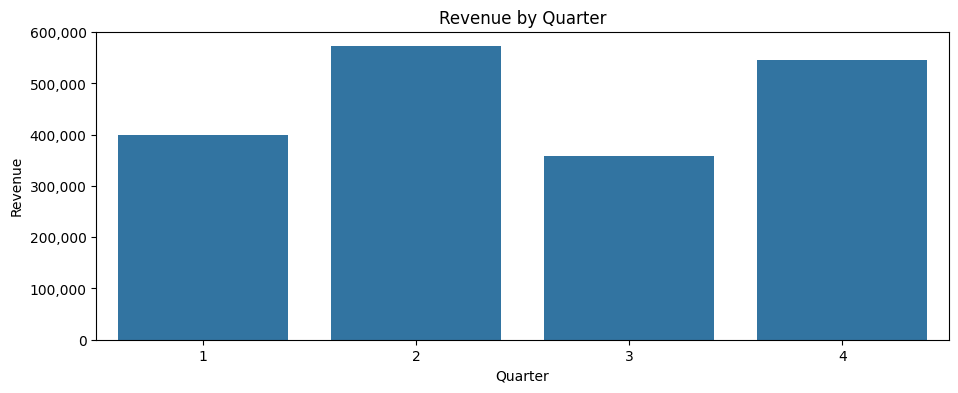

In [272]:
create_bar_plot(df, 'quarter', 'revenue', 'sum')

Interpretation:
- Q2 is the highest revenue quarter with Q4 slightly behind
- Q2 revenue is ~250k more than Q3

### 4.4.2 Total Revenue by Month

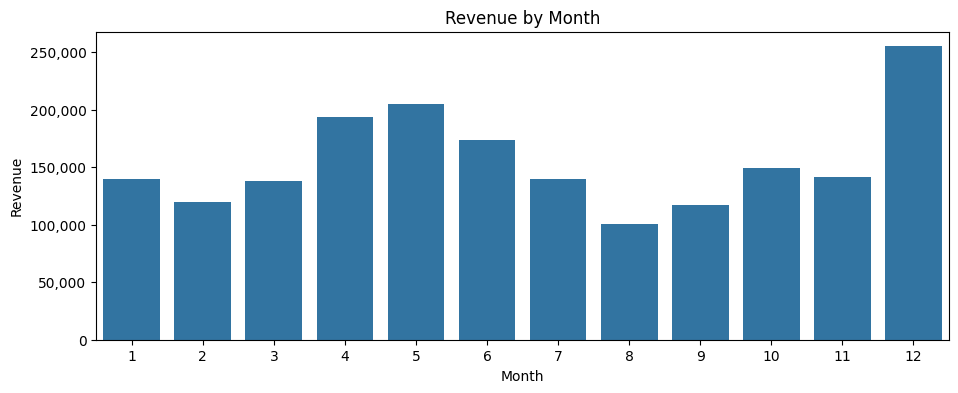

In [273]:
create_bar_plot(df, 'month', 'revenue', 'sum')

Interpretation:
- December has the highest revenue despite the other months in Q3/Q4 being relatively low performing months
- February and August are low performing months
- Q3 low potentially due to summer?

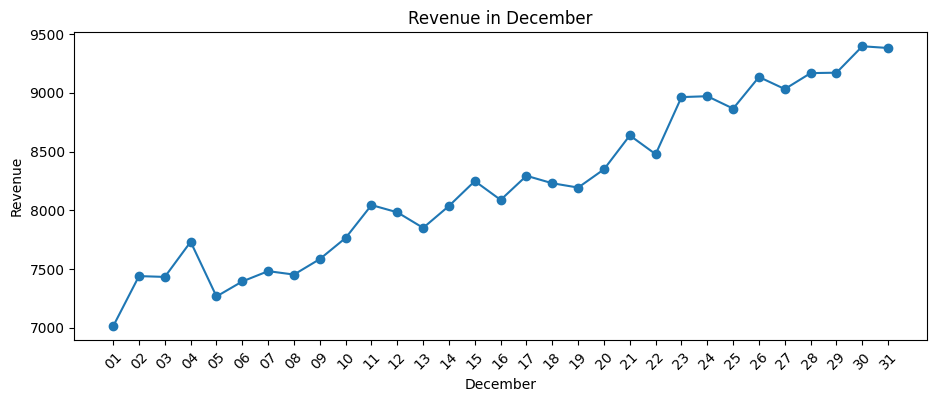

In [269]:
create_line_plot_month(df, 'december', 'revenue')

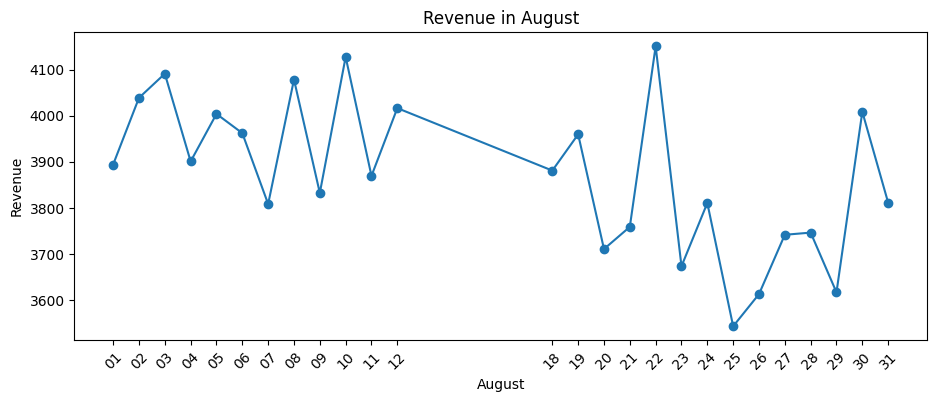

In [287]:
create_line_plot_month(df, 'august', 'revenue')

Interpretation:
- Some values are missing in August leading to incorrect revenue totals

### 4.4.3 Total Revenue by Day

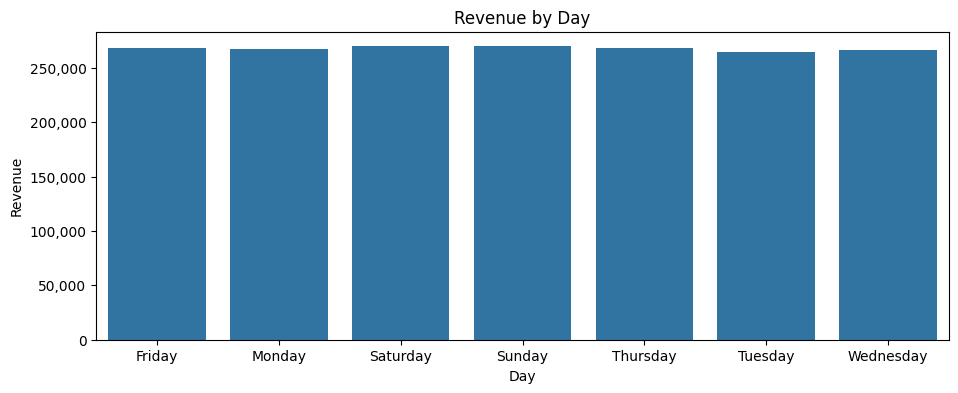

In [274]:
create_bar_plot(df, 'day', 'revenue', 'sum')

Interpretation:
- Revenue is not affected by day

### 4.4.4 Total Daily Active Users per Quarter

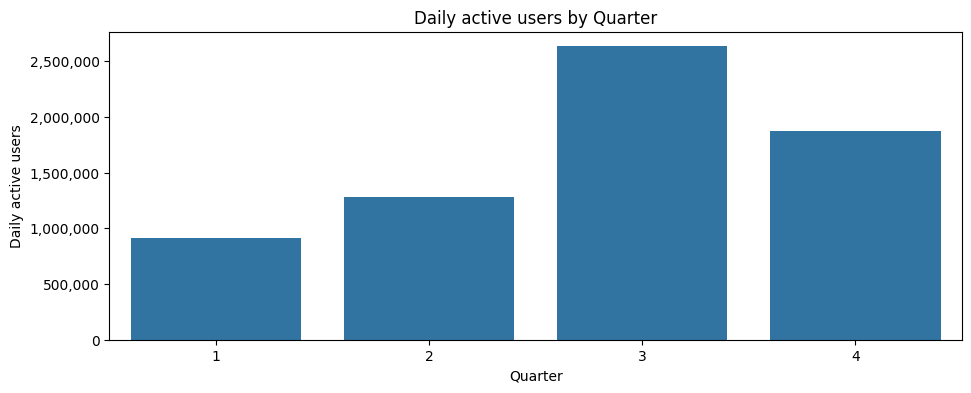

In [275]:
create_bar_plot(df, 'quarter', 'daily_active_users', 'sum')

### 4.4.5 Total Daily Active Users per Month

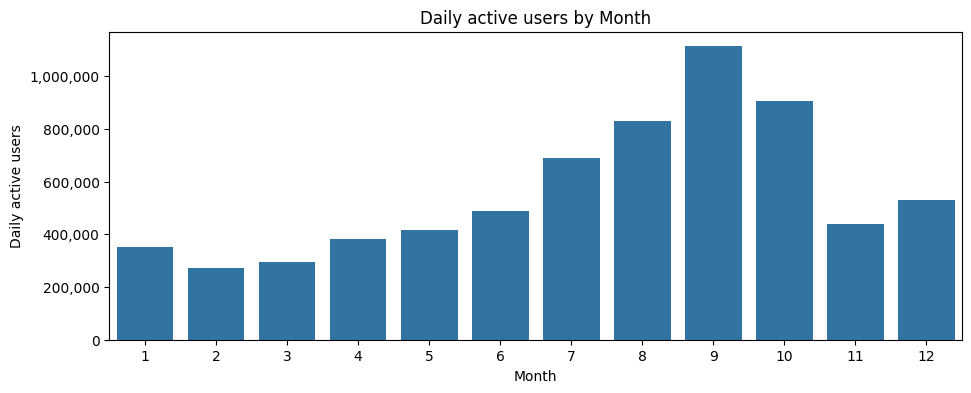

In [276]:
create_bar_plot(df, 'month', 'daily_active_users', 'sum')

Interpretation:
- Q3 has a massive increase in player engagement
- Q1 has the lowest engagement of the year
- Focus may have shifted on user acquistion or promotional ofers may have attracted a larger audience

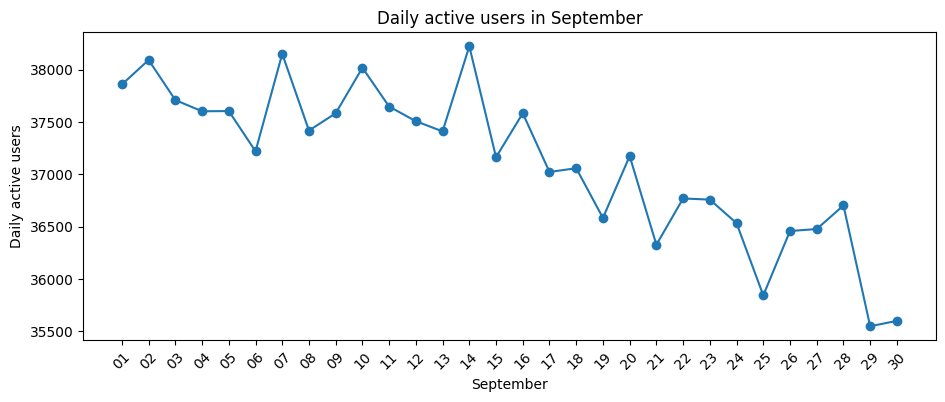

In [282]:
create_line_plot_month(df, 'september', 'daily_active_users')

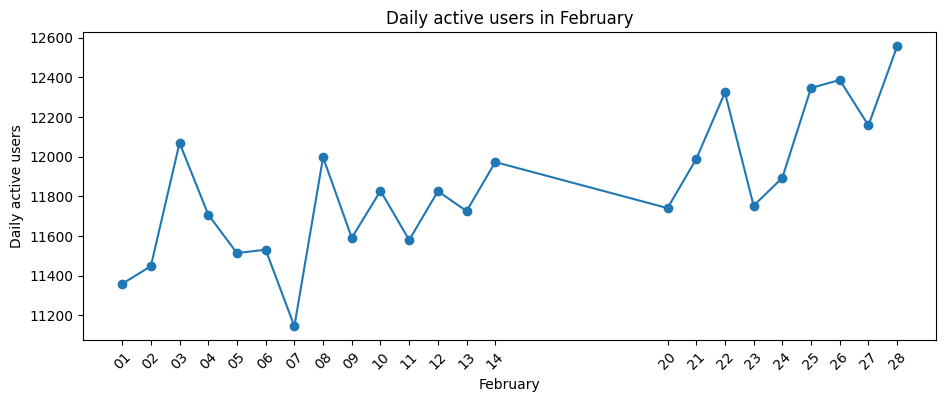

In [283]:
create_line_plot_month(df, 'february', 'daily_active_users')

### 4.4.6 Total Daily Active Users per Day

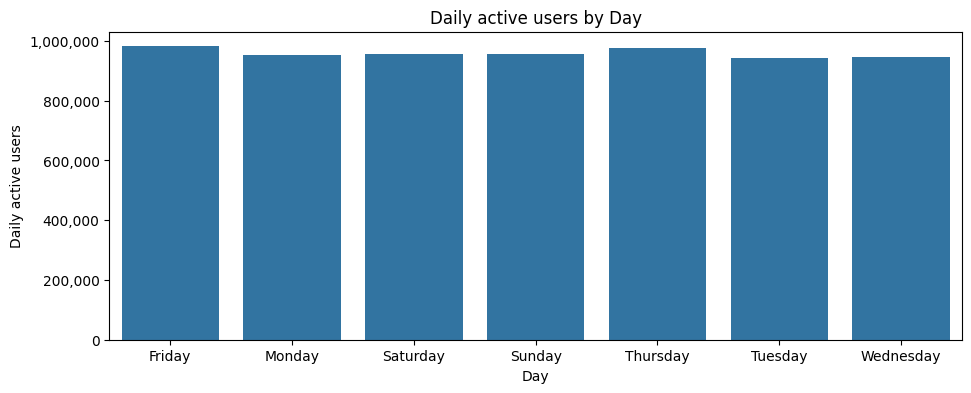

In [277]:
create_bar_plot(df, 'day', 'daily_active_users', 'sum')

Interpretation:
- User engagement is stable across all days
- There is a minimal increase on Fridays comparatively

### 4.4.7 Total Revenue per User by Quarter

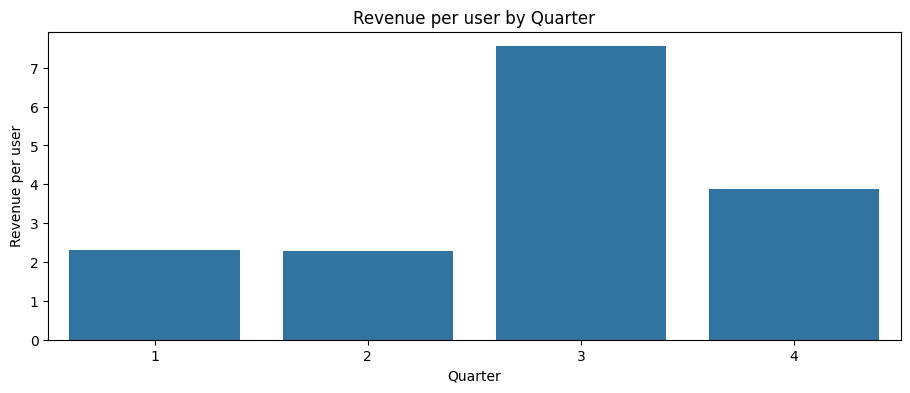

In [13]:
create_bar_plot(df, 'quarter', 'revenue_per_user', 'mean')

### 4.4.8 Total Revenue per User by Month

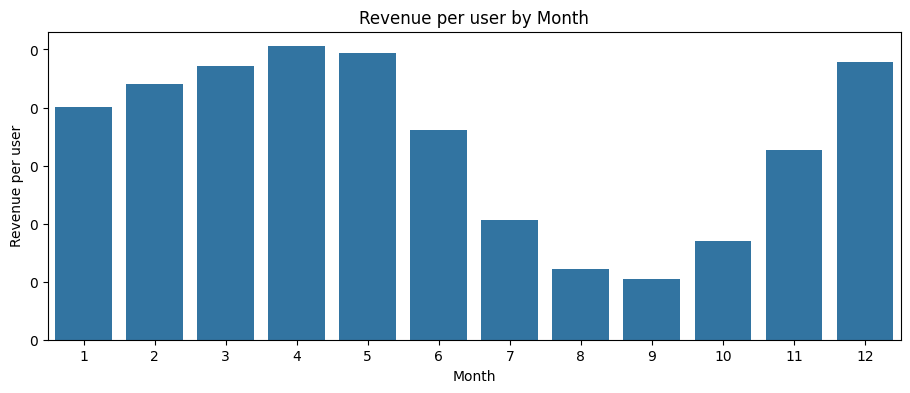

In [18]:
create_bar_plot(df, 'month', 'revenue_per_user', 'mean')

Interpretation:
- Peaks in Q3
- Low Q1 and November, December purchases

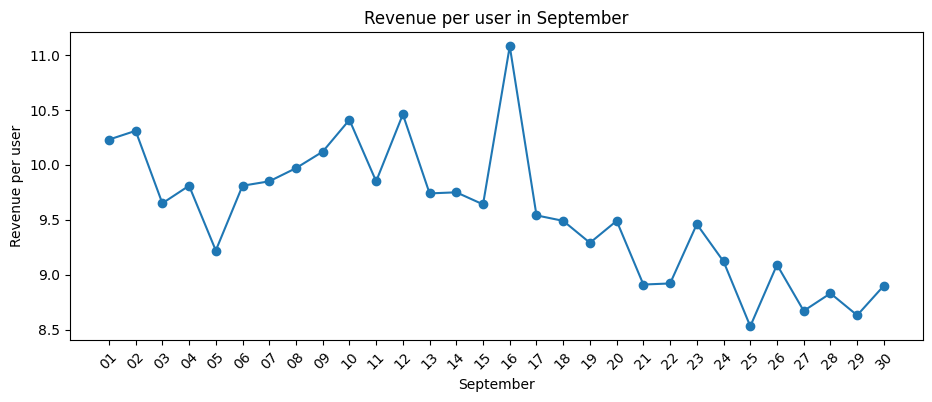

In [288]:
create_line_plot_month(df, 'september', 'revenue_per_user')

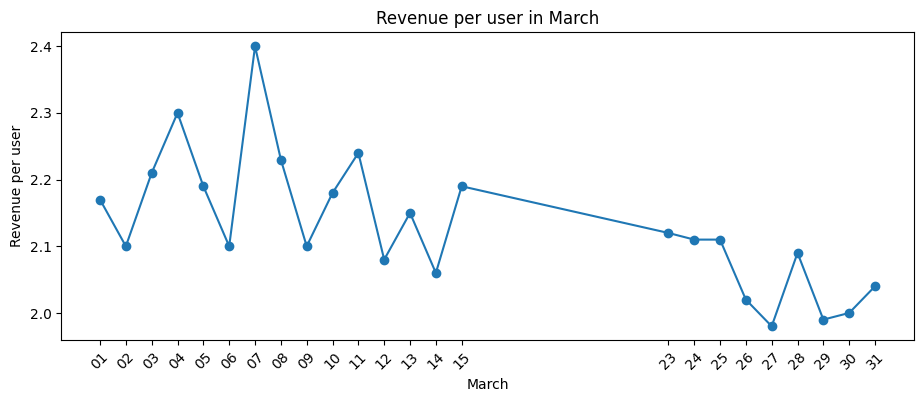

In [289]:
create_line_plot_month(df, 'march', 'revenue_per_user')

### 4.4.9 Total Revenue per User by Day

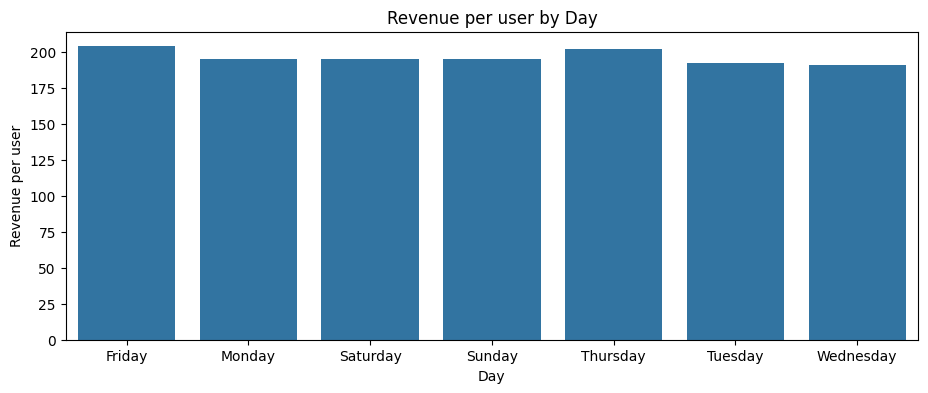

In [280]:
create_bar_plot(df, 'day', 'revenue_per_user', 'sum')

### 4.4.10 Revenue vs Daily Active Users 

In [19]:
df.head()

,date,quarter,month,day,daily_active_users,daily_active_users_diff,daily_active_users_pct_change,revenue,cumulative_revenue,revenue_diff,revenue_pct_change,revenue_per_user
0,2022-01-01,1,1,Saturday,10981,0.0,0.00,4141.11,4141.11,0.00,0.00,0.38
1,2022-01-02,1,1,Sunday,10730,-251.0,-0.02,4191.86,8332.97,50.75,0.01,0.39
2,2022-01-03,1,1,Monday,10846,116.0,0.01,4406.19,12739.16,214.33,0.05,0.41
3,2022-01-04,1,1,Tuesday,11386,540.0,0.05,4375.55,17114.71,-30.64,-0.01,0.38
4,2022-01-05,1,1,Wednesday,10916,-470.0,-0.04,4084.96,21199.67,-290.59,-0.07,0.37


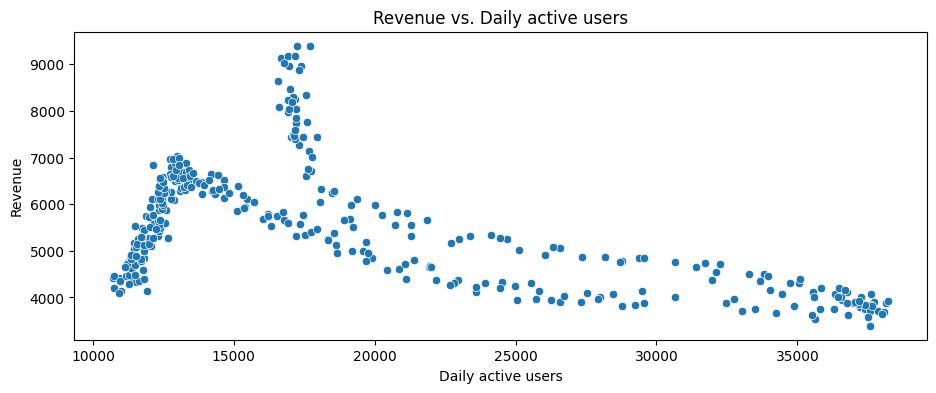

In [281]:
create_scatter_plot(df, 'daily_active_users', 'revenue')

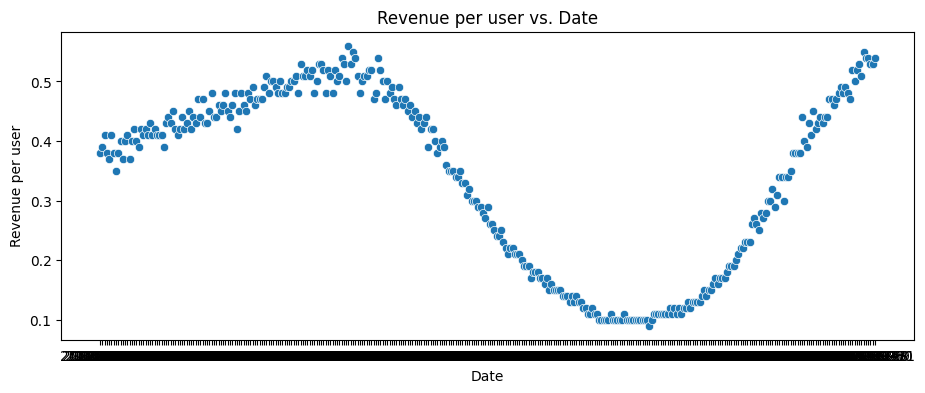

In [23]:
create_scatter_plot(df, 'date', 'revenue_per_user')

Interpretation:
- Inverse relationship between revenue and daily active users
- As DAU increases, daily revenue decreases

February, March, August, and November are missing (6-8) entries depending on the month which will lead to potentially misleading visualizations due to the missing data.